### Bootstrap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("michelson_speed_of_light.csv")

In [ ]:
speeds = data["velocity of light in air (km/s)"]

In [4]:
speeds.size

100

In [5]:
bs_sample = np.random.choice(speeds, size = 100)

In [6]:
np.mean(bs_sample)

299852.4

In [7]:
def bootstrap_replicate(data, function):
    bs_sample = np.random.choice(data, len(data))
    return function(bs_sample)

In [8]:
bootstrap_replicate(speeds, np.mean)

299859.3

In [9]:
bs_results = np.empty(10000)

for i in range(10000):
    bs_results[i] = bootstrap_replicate(speeds, np.mean)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


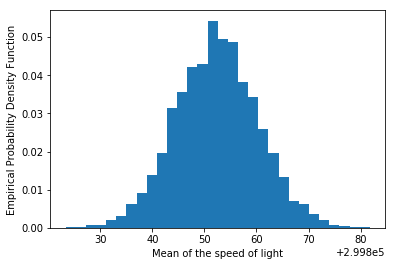

In [10]:
_ = plt.hist(bs_results, bins = 30, normed=True)
_ = plt.xlabel("Mean of the speed of light")
_ = plt.ylabel("Empirical Probability Density Function")
plt.show()

In [11]:
conf_interval = np.percentile(bs_results, [2.5, 97.5])
conf_interval

array([299836.9975, 299868.4   ])

#### Pairs bootstrap

In [12]:
female_literacy_fertility = pd.read_csv("female_literacy_fertility.csv")

In [13]:
illiteracy = 100 - female_literacy_fertility["female literacy"]

In [14]:
fertility = female_literacy_fertility["fertility"]

In [17]:
def pairs_linear_regression_bs(x, y, size = 1):
    
    #indexes for the sampling
    indices = np.arange(len(x))
    
    bs_slopes = np.empty(size)
    bs_intercepts = np.empty(size)
    
    for i in range(size):
        bs_indexes = np.random.choice(indices, size = len(indices))
        bs_x = x[bs_indexes]
        bs_y = y[bs_indexes]
        bs_slopes[i], bs_intercepts[i] = np.polyfit(bs_x, bs_y, deg=1)
    
    return bs_slopes, bs_intercepts

In [18]:
pairs_linear_regression_bs(illiteracy, fertility)

(array([0.04876657]), array([1.99775244]))

In [19]:
slopes_results, intercepts_results = pairs_linear_regression_bs(illiteracy, fertility, 1000)

In [20]:
# confidence interval for the slope 
np.percentile(slopes_results, [2.5, 97.5])

array([0.04445306, 0.0552679 ])

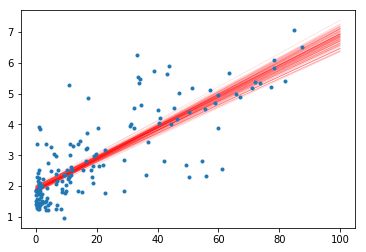

In [24]:
# Visualization of each "bootstrap line"
x = np.array([0, 100])

for i in range(100):
    _ = plt.plot(x, slopes_results[i] * x + intercepts_results[i],
                linewidth = 0.5, alpha = 0.2, color = "red")
    
_ = plt.plot(illiteracy, fertility, marker = ".", linestyle = "none")

### Optimization

#### Newton-Raphson

In [25]:
import numpy as np 
from numpy import linalg as la
import scipy as sci 
import matplotlib.pyplot as plt 

In [26]:
x = np.arange(-5, 5, 0.1)
def f(x):
    return (x**3 - 2*x + 7)/(x**4 + 2)

In [27]:
y = f(x)

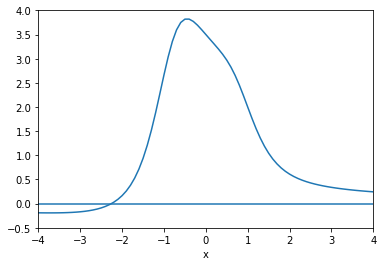

In [29]:
p1 = plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-0.5, 4)
plt.xlabel("x")

# roots
plt.axhline(0)

In [33]:
def fprime(x):
    return (x**4 + 2)**(-2)*((3*x**2-2)*(x**4+2) - 4*x**3*(x**3-2*x+7))

In [34]:
def NR(x0, tol, f, fprime):
    xval = x0
    xstore = np.empty(1)
    xstore[0] = xval
    
    notconverge = 1
    its = 1
    
    while notconverge == 1:
        nextvalue = xval - f(xval)/fprime(xval)
        
        error = f(nextvalue)
        
        if error > tol:
            notconverge = 1
            its = its + 1
            xval = nextvalue
            xstore = np.append(xstore, nextvalue)
        else:
            notconverge = 0
            
    return ({"estimate": xval, "number of iterations": its, "sequence of estimates": xstore})

In [35]:
NR(-1, 0.0001, f, fprime)

{'estimate': -2.2546433717066834,
 'number of iterations': 5,
 'sequence of estimates': array([-1.        , -1.68571429, -2.01135095, -2.2005717 , -2.25464337])}

In [36]:
from scipy import optimize
scipy_result = sci.optimize.newton(f, x0=-1, fprime = fprime)

In [37]:
scipy_result

-2.2582588834026085

### EM for mixture of normal densities 

In [38]:
# The problem: to get the MLE estimate of the Theta vector of parameters 
# Avoiding analytical solution 

import numpy as np
from numpy import random 
from scipy.optimize import minimize, show_options
import matplotlib.pyplot as plt 
import math 
import matplotlib.mlab as mlab 

In [41]:
def gaussian(x, mean, dev=0.1):
    # standard deviation, square root of variance
    return 1/math.sqrt(2*math.pi)/dev*math.exp(-(x-mean)**2/2/dev**2)

In [48]:
# Generate data 
N = 10000
a = 0.3

sample1 = random.normal(0, 0.1, size = int(N*a))
sample2 = random.normal(3, 0.1, size = int(N*(1-a)))

sample = np.concatenate([sample1, sample2])

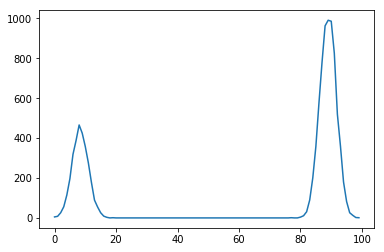

In [49]:
hist, bin_edges = np.histogram(sample, bins=100)
plt.plot(hist)

[-0.07886171  2.50030362  0.15562507]
[-0.00316735  2.99981579  0.3       ]
[-0.00316735  2.99981579  0.3       ]


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


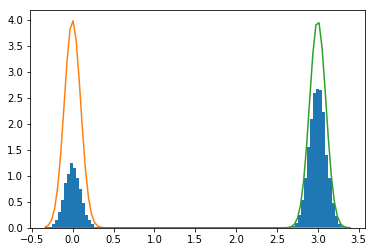

In [50]:
max_iter = 100 

# initial values 
params = np.array([-1, 1, 0.5])

counter = 0 
converged = False 
tol = 0.1

plabel1 = np.zeros(sample.shape)
plabel2 = np.zeros(sample.shape)

while not converged and counter < max_iter:
    counter += 1
    
    mu1, mu2, pi_1 = params
    
    # Expectation step 
    for i in range(len(sample)):
        cdf1 = gaussian(sample[i], mu1)
        cdf2 = gaussian(sample[i], mu2)
        
        pi_2 = 1 - pi_1
        
        plabel1[i] = cdf1 * pi_1 / (cdf1 * pi_1 + cdf2 * pi_2)
        plabel2[i] = cdf2 * pi_2 / (cdf1 * pi_1 + cdf2 * pi_2)
        
    # Maximization 
    mu1 = sum(sample * plabel1)/sum(plabel1)
    mu2 = sum(sample * plabel2)/sum(plabel2)
    pi_1 = sum(plabel1)/len(sample)
    
    new_parameters = np.array([mu1, mu2, pi_1])
    print(new_parameters)
    
    # Checking the convergence 
    if np.max(abs(np.asarray(params) - np.asarray(new_parameters))) < tol:
        converged = True
    
    params = new_parameters
    

plt.hist(sample, bins = 100, normed = True)

x = np.linspace(sample.min(), sample.max(), 100)

plt.plot(x, mlab.normpdf(x, mu1, 0.1))
plt.plot(x, mlab.normpdf(x, mu2, 0.1))

plt.show()